Area                 0
Development_Level    0
Traffic              2
dtype: int64
               antecedents              consequents  antecedent support  \
0  (Development_Level_Low)            (Area_Africa)            0.572727   
1            (Area_Africa)  (Development_Level_Low)            0.254545   
2            (Area_Africa)          (Traffic_Small)            0.254545   
3          (Traffic_Small)            (Area_Africa)            0.513636   
4  (Development_Level_Low)          (Traffic_Small)            0.572727   

   consequent support   support  confidence      lift  representativity  \
0            0.254545  0.236364    0.412698  1.621315               1.0   
1            0.572727  0.236364    0.928571  1.621315               1.0   
2            0.513636  0.200000    0.785714  1.529709               1.0   
3            0.254545  0.200000    0.389381  1.529709               1.0   
4            0.513636  0.450000    0.785714  1.529709               1.0   

   leverage  con

/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


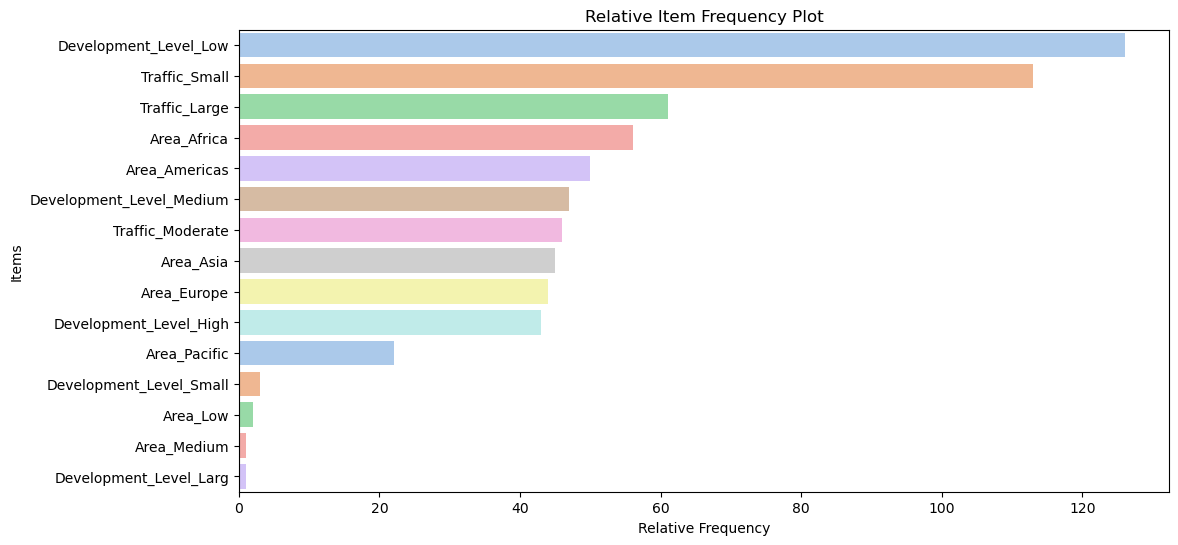

                               antecedents  \
7   (Development_Level_Low, Traffic_Small)   
10                           (Area_Africa)   
8             (Area_Africa, Traffic_Small)   
9                  (Development_Level_Low)   
6     (Development_Level_Low, Area_Africa)   
11                         (Traffic_Small)   
0                  (Development_Level_Low)   
1                            (Area_Africa)   
3                          (Traffic_Small)   
2                            (Area_Africa)   

                               consequents  antecedent support  \
7                            (Area_Africa)            0.450000   
10  (Development_Level_Low, Traffic_Small)            0.254545   
8                  (Development_Level_Low)            0.200000   
9             (Area_Africa, Traffic_Small)            0.572727   
6                          (Traffic_Small)            0.236364   
11    (Development_Level_Low, Area_Africa)            0.513636   
0                            (A

In [3]:
!pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
DF = pd.read_csv("cleaned_departures_development_traffic1.csv")

# Remove specified columns
DF = DF.drop(columns=["Departures", "Domestic", "International", "FlagCarrier_Flights", "Name"], errors='ignore')

# Check for missing values
print(DF.isna().sum())

# Remove rows with missing values
DF = DF.dropna()

# Convert dataset into a format suitable for association rule mining (One-Hot Encoding)
DF_encoded = pd.get_dummies(DF)

# Generate frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(DF_encoded, min_support=0.15, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.25)

# Display the first few association rules
print(rules.head())

# Plot the top 20 items by frequency
item_counts = DF_encoded.sum().sort_values(ascending=False)[:20]
plt.figure(figsize=(12, 6))
sns.barplot(x=item_counts.values, y=item_counts.index, palette='pastel')
plt.xlabel("Relative Frequency")
plt.ylabel("Items")
plt.title("Relative Item Frequency Plot")
plt.show()

# Sort the rules by lift and display the top 10
sorted_rules = rules.sort_values(by="lift", ascending=False)
print(sorted_rules.head(10))



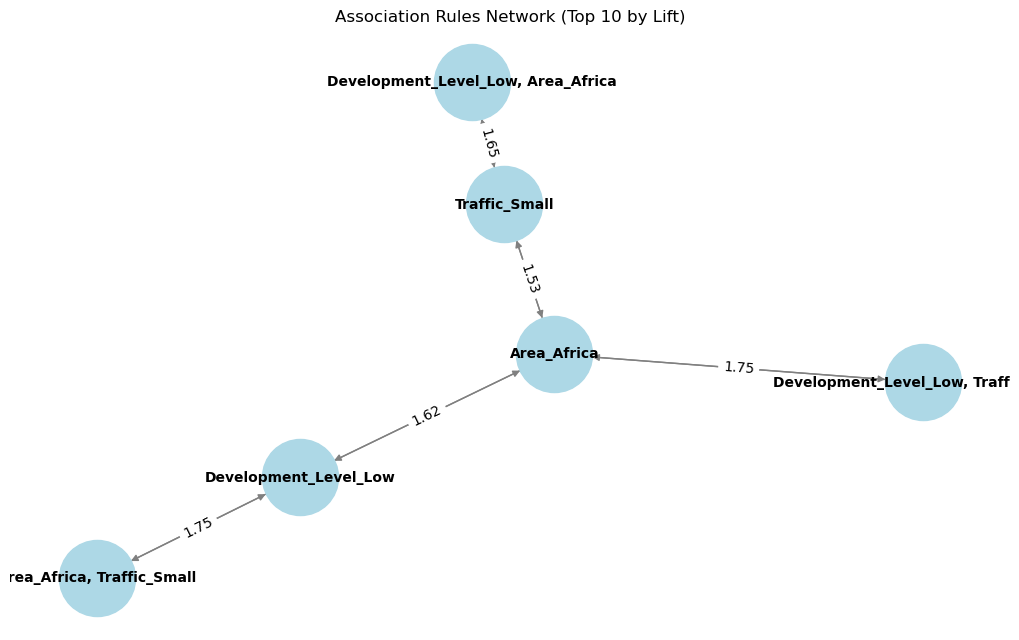

In [5]:


import networkx as nx

# Select top 10 rules by lift
top_rules = sorted_rules.head(10)

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for _, rule in top_rules.iterrows():
    lhs = ", ".join(rule["antecedents"])
    rhs = ", ".join(rule["consequents"])
    G.add_edge(lhs, rhs, weight=rule["lift"])

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
edges = G.edges(data=True)

# Draw network
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=10, font_weight="bold")
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)
plt.title("Association Rules Network (Top 10 by Lift)")
plt.show()
